In [1]:
# Homework 1:
# Solve the diffusion equation u_t=D u_{xx} with D=1 in the interval x=[0,1] from t=0 to t=0.1. 
# The initial condition is u(x,0)=0.5*(cos(13x)+1), the boundary condition is u(0,t)=1 and u(1,t)=0.
# After solving the equation, please also change tend to a large value to see how the solution behave in the long run.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

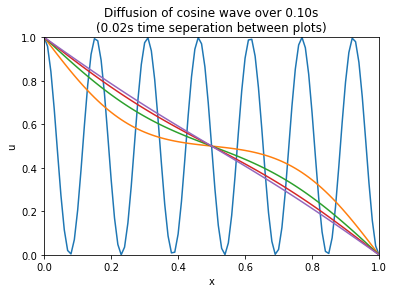

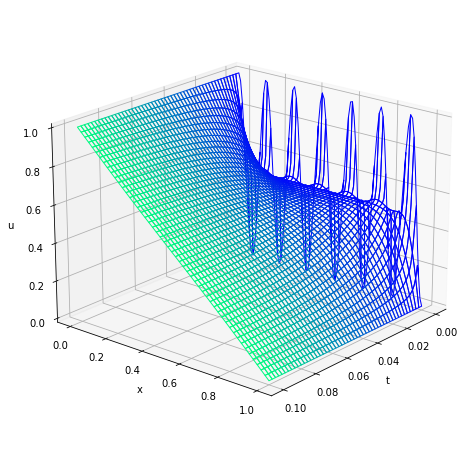

In [3]:
# Solve diffusion equation using FTCS

D = 1
dx = 0.01
dt = 1 * dx**2/2/D
x_min = 0
x_max = 1
t_end = 0.1
t_plot = 0.02  # plots every this many seconds

t_plot_interval = t_plot

xs = np.arange(x_min,x_max+dx,dx)
us = 0.5*(np.cos(13*np.pi*xs)+1)
plt.plot(xs,us,label='0.00s')

t = 0
ts = [t]
us_all = [us]
while t < t_end:
    us_new = np.zeros(len(xs))  # initialize next future u values
    us_new[0],us_new[1] = 1,0  # set boundary conditions
    
    # calculate next future u values
    for i in range(1,len(xs)-1):
        us_new[i] = us[i] + D*dt/dx**2 * (us[i+1]-2*us[i]+us[i-1])
    us = us_new.copy()  # set current u values to the future u values just calculated
    us_all.append(us)
    # plot results every once in a while (controlled by t_plot)
    if t > t_plot:
        plt.plot(xs,us,label='{:.2f}s'.format(float(t)))
        t_plot += t_plot_interval
        
    t += dt
    ts.append(t)
    
us_all = np.array(us_all)

# plot formatting
plt.title('Diffusion of cosine wave over {:.2f}s\n({:.2f}s time seperation between plots)'.format(t_end,t_plot_interval))
plt.xlabel('x')
plt.ylabel('u')
plt.xlim(x_min,x_max)
plt.ylim(0,1)

# 3d plotting
rcount = 100
ccount = 100
us_all = us_all[::int(len(ts)/rcount),::int(len(xs)/ccount)]
ts = ts[::int(len(ts)/rcount)]
xs = xs[::int(len(xs)/ccount)]
xs_mesh,ts_mesh = np.meshgrid(xs,ts)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.view_init(elev=20,azim=40)
norm = plt.Normalize(ts_mesh.min(), ts_mesh.max())
colors = cm.winter(norm(ts_mesh))
surf = ax.plot_surface(ts_mesh,xs_mesh,us_all,
                       rcount=rcount, 
                       ccount=ccount, 
                       facecolors=colors, 
                       shade=False)

surf.set_facecolor((0,0,0,0))
